### 实验介绍

#### 数据说明
该数据集是来自美国疾病控制预防中心的数据，背景是记录美国的糖尿病症状信息，现在美国1/7的成年人患有糖尿病。但是到2050年，这个比例将会快速增长至高达1/3。我们可以利用从UCI机器学习数据库里一个关于印第安人糖尿病数据集，通过数据挖掘相关算法来预测糖尿病，该问题本质上是一个二元分类问题。


### 挖掘流程

In [1]:
# 警告处理 
import warnings
warnings.filterwarnings('ignore')
# 在Jupyter上画图
%matplotlib inline

In [2]:
#引入相关支持的包
import pandas as pd
import numpy as np
#可以事先将提供的数据集存储在本地，此处对该地址进行引用即可
#注意文件所存放路径不要有中文，容易报错
df= pd.read_csv(r'pima-indians-diabetes.data',sep=',')
#并观察熟悉数据
print(df.shape)
df.head()


(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFuction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


利用head函数，可以看到：糖尿病数据集由768个数据点组成，各有9个特征，特征分别是：怀孕次数，血糖，血压，皮脂厚度，胰岛素，BMI身体质量指数，糖尿病遗传函数，年龄和结果，此处是一个数据框格式，前8个特征均是数值型属性，最后1列是目标向量，是我们将要预测的特征，其中0意味着未患糖尿病，1意味着患有糖尿病。

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pregnancies              768 non-null    int64  
 1   Glucose                  768 non-null    int64  
 2   BloodPressure            768 non-null    int64  
 3   SkinThickness            768 non-null    int64  
 4   Insulin                  768 non-null    int64  
 5   BMI                      768 non-null    float64
 6   DiabetesPedigreeFuction  768 non-null    float64
 7   Age                      768 non-null    int64  
 8   Outcome                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

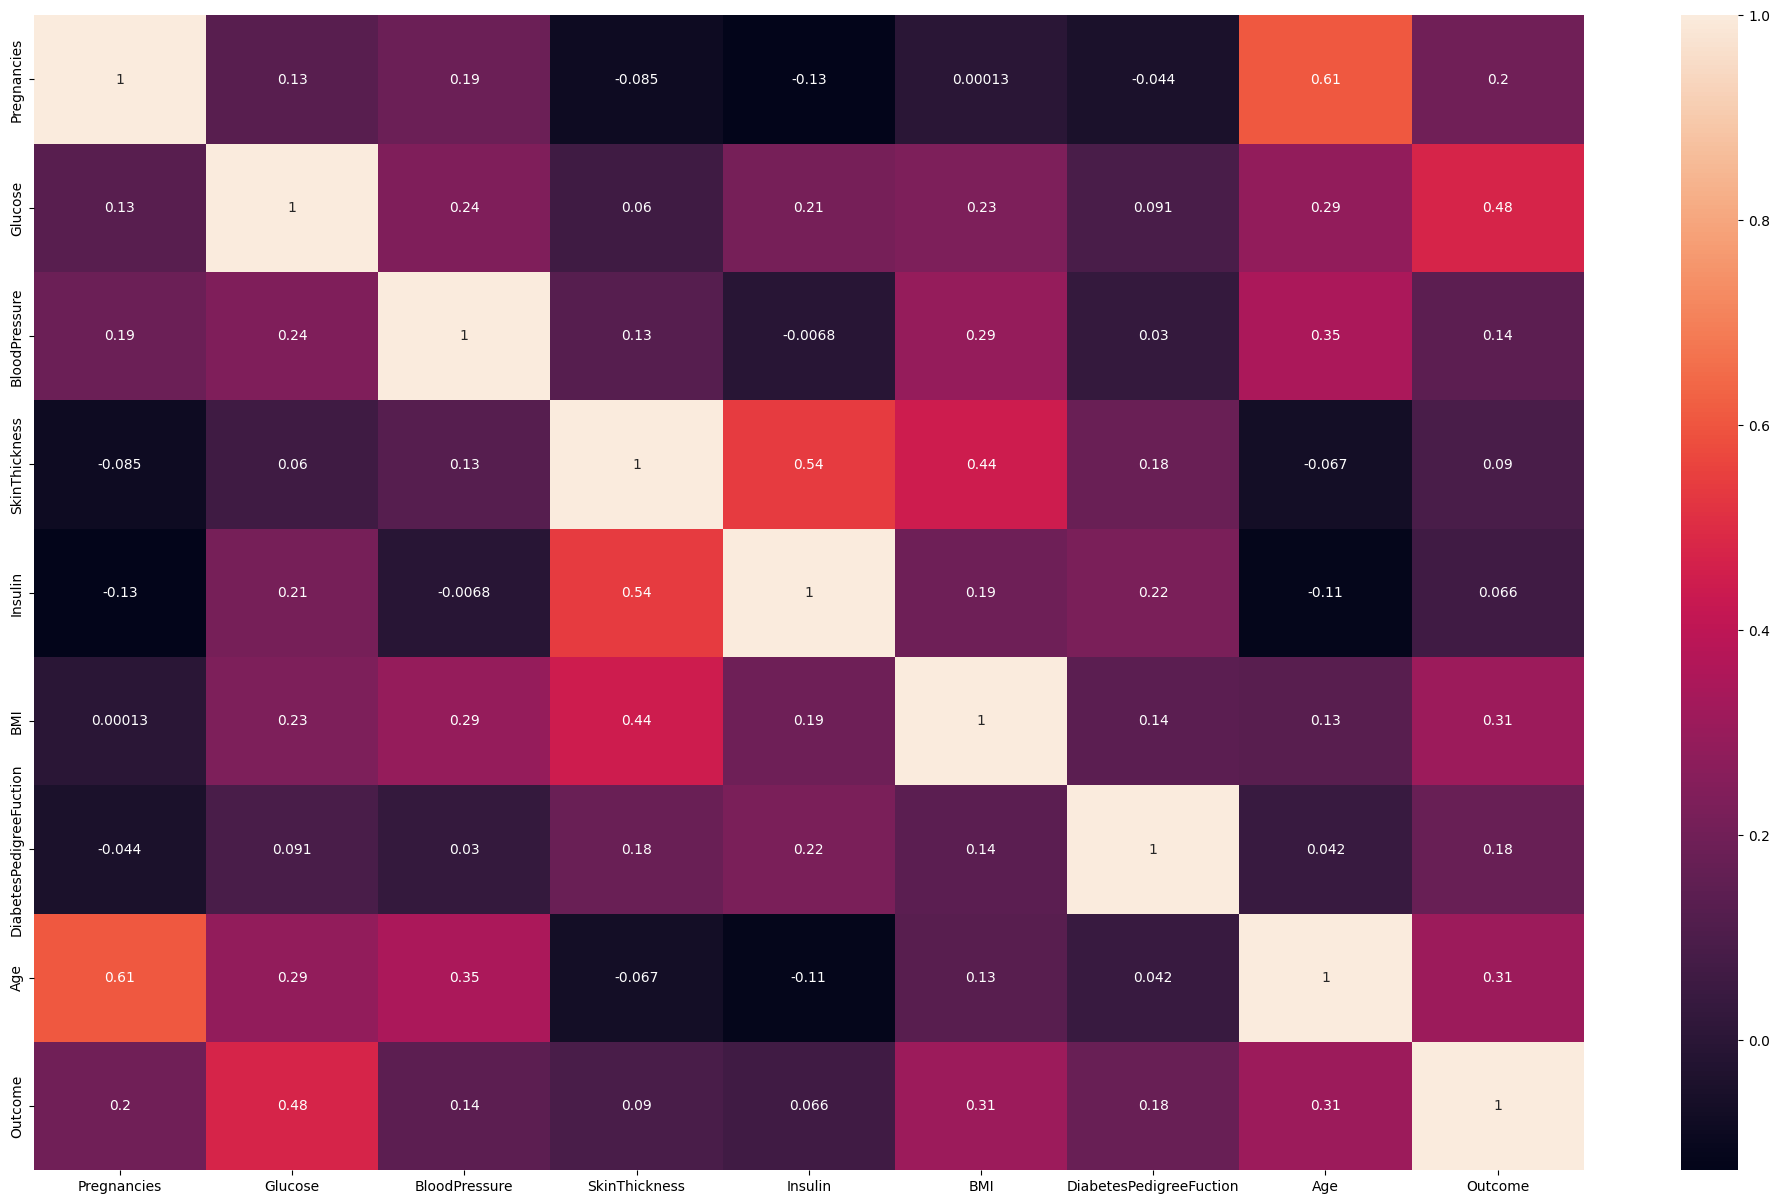

In [5]:
#导入相关包
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#计算特征相关性并可视化
corr_matrix = df.corr(method='spearman') # pearson 皮尔逊, 是spearman 斯皮尔曼 
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot= True)


In [6]:
import math
# 绘制每个特征的分布
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid') 
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace) # 调整图表位置和大小间距
    rows = math.ceil(float(dataset.shape[1]) / cols)# ceil方法向上取整
    for i, column in enumerate(dataset.columns): #返回索引和列名
        ax = fig.add_subplot(rows, cols, i + 1)# 创建子图，类似于subplot方法
        ax.set_title(column)	# 设置轴的标题
        if dataset.dtypes[column] == np.object: # 通过列的类型来区分所选取的图像类型
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25) 
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)



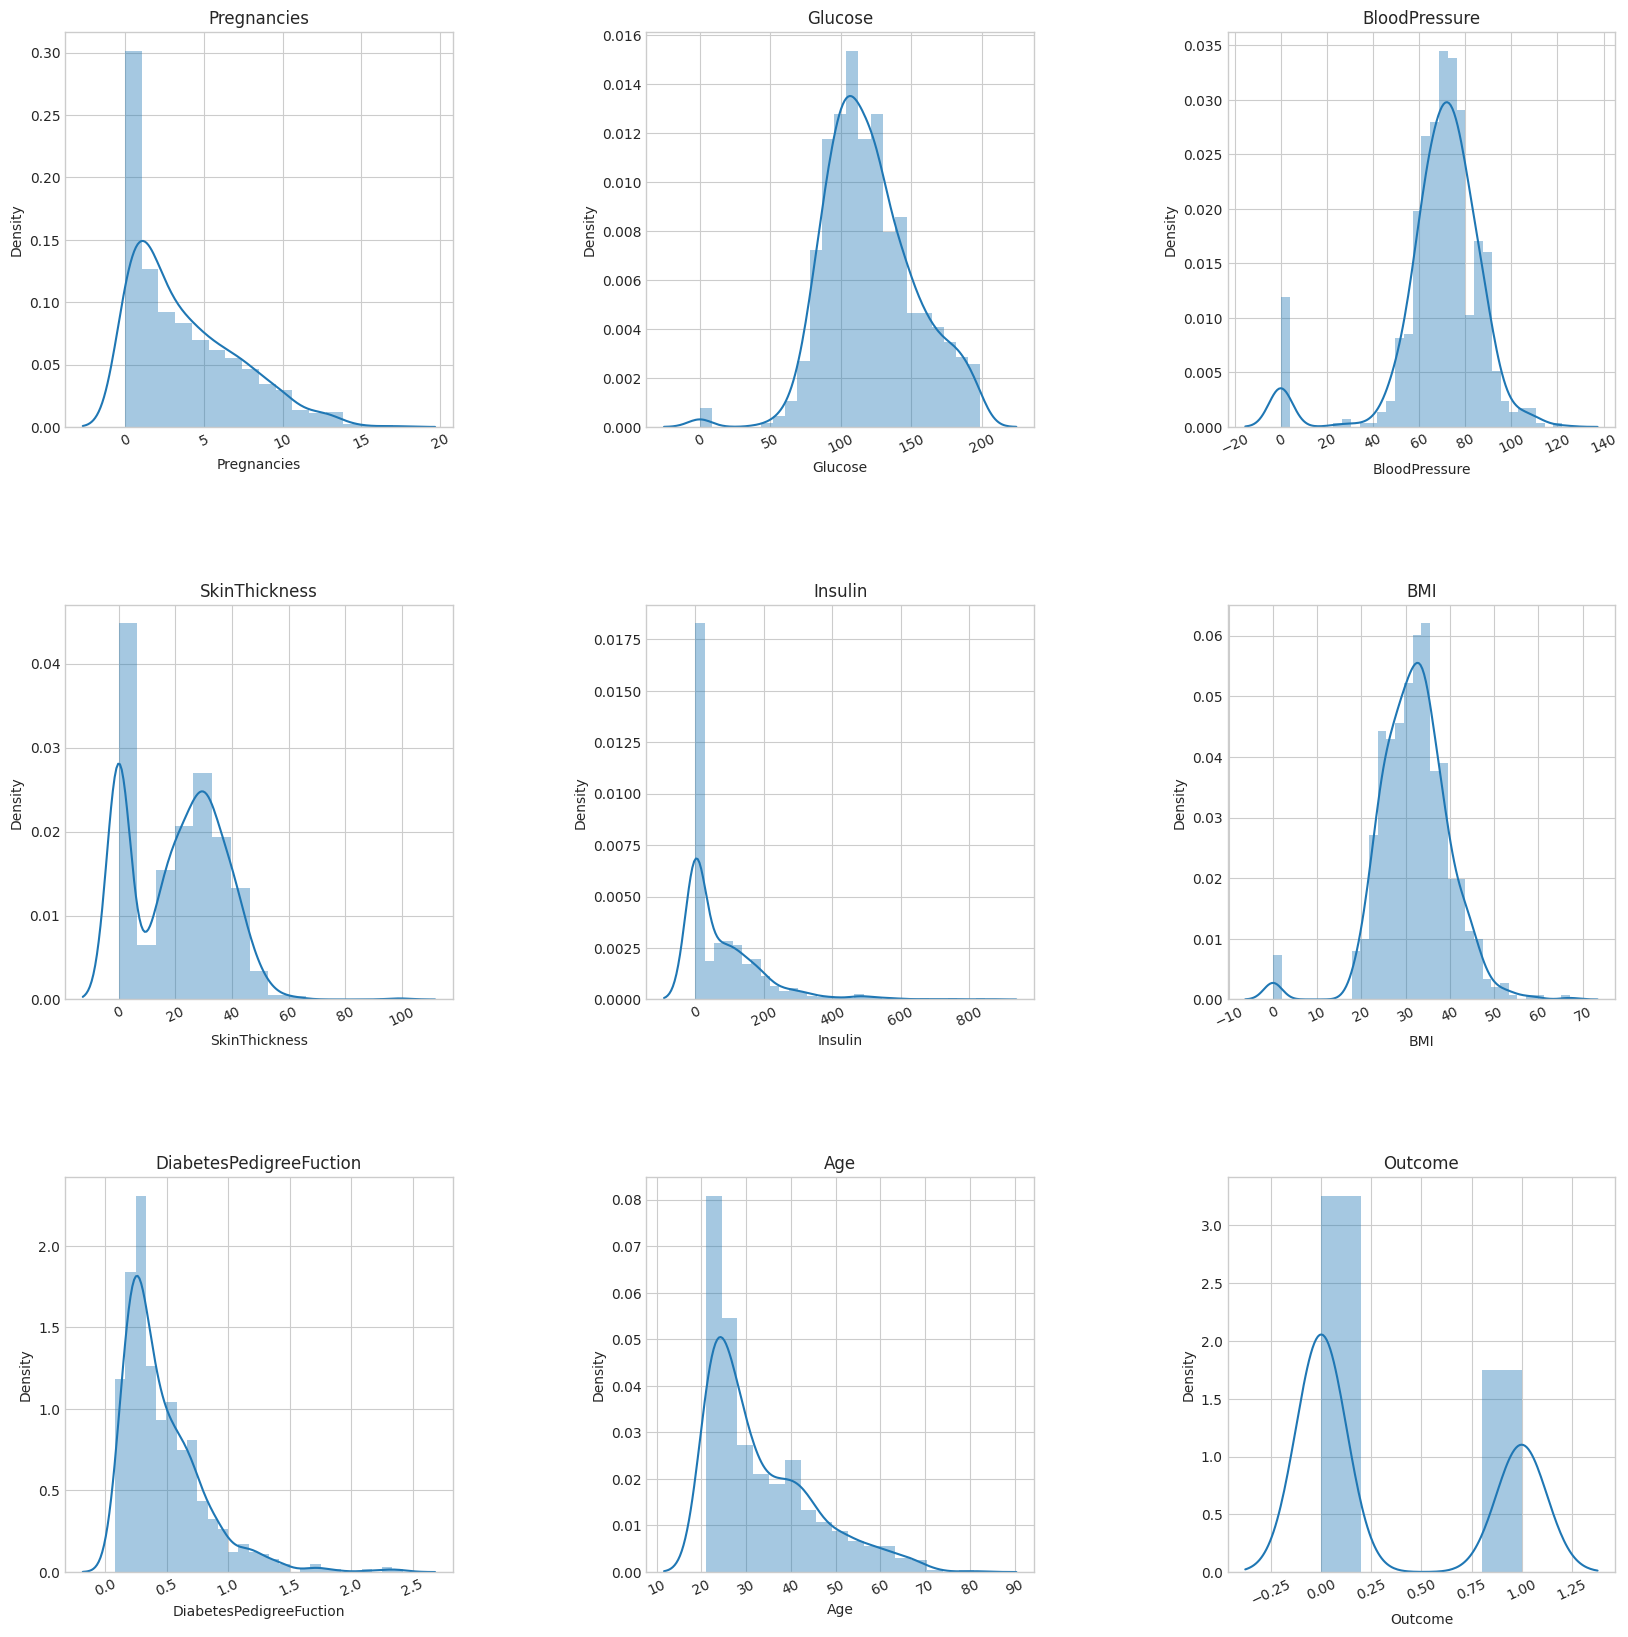

In [7]:
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [8]:
from sklearn.model_selection import train_test_split
from collections import Counter
x_cols = [col for col in df.columns if col!='Outcome']
y_col = 'Outcome'
X=df[x_cols].values    #dataframe 转化为 ndarray,才能进入下面的标准化和3D制图
y=df[y_col].values


##### Axes3D 绘图函数
是mpl_toolkits.mplot3d中的一个绘图函数，mpl_toolkits.mplot3d

p3d.Axes3D.scatter( xs, ys, zs=0, zdir=’z’, s=20, c=None, depthshade=True, *args, **kwargs )

p3d.Axes3D.scatter3D( xs, ys, zs=0, zdir=’z’, s=20, c=None, depthshade=True, *args, **kwargs)

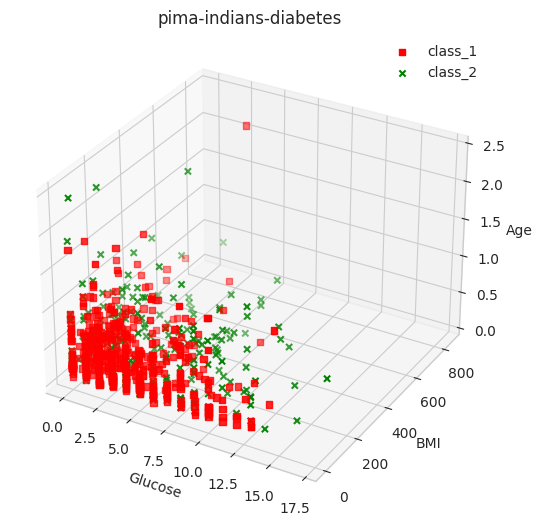

In [9]:
### 绘制3D散点图-3个维度的数据点的散点分布
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(plt.figure())
for c,m,i,l in zip('rg','sx',np.unique(y),['class_1','class_2']):
    ax.scatter(X[y==i ,0], X[y==i, 4], X[y==i, 6],c=c,marker=m, label=l)
ax.set_xlabel(df.columns[1])
ax.set_ylabel(df.columns[5])
ax.set_zlabel(df.columns[7])
ax.set_title("pima-indians-diabetes")
plt.legend()
plt.show()


In [10]:
### 对输入特征进行降维处理
from sklearn.decomposition import PCA
from sklearn import preprocessing                    #调用标准化模块
X_std = preprocessing.scale(X)                        #降维训练前需要对数据标准化
pca = PCA(n_components=0.95, random_state=0.99)       # 保留99%信息的主成分个主成分
X_pca =pca.fit(X_std).transform(X_std)

In [11]:
print('the Top 95% variance_ratio:',pca.explained_variance_ratio_)

the Top 95% variance_ratio: [0.26185321 0.21640525 0.12862254 0.10946977 0.09528539 0.08533321
 0.05247248 0.05055815]


In [12]:
X_pca.shape
print(X_pca)

[[ 1.07033849  1.2343164   0.09729983 ...  0.35715829  0.85896619
   0.97355847]
 [-1.12260289 -0.73379895 -0.71533374 ... -0.40578054  0.75790965
   0.35348427]
 [-0.39888865  1.5967823   1.75659505 ... -0.03927386 -1.15181668
   1.06994571]
 ...
 [-0.2802779   0.09540732 -0.06855471 ... -0.54014265 -0.33609166
   0.28941066]
 [-1.06031347  0.83654985  0.42611237 ...  0.15292186  1.17949032
  -0.535553  ]
 [-0.83592506 -1.15376894 -1.00347735 ... -0.15124145  0.24480821
   0.51549661]]


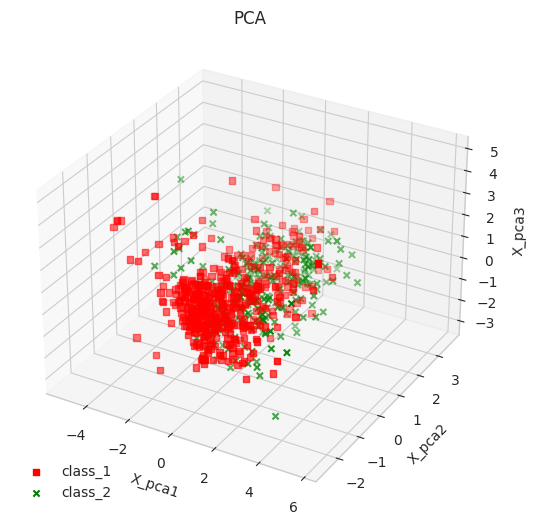

In [13]:
### 输出降维后的前3个主成分的分布图
ax = Axes3D(plt.figure())
for  c, m ,i,l in zip('rg','sx',np.unique(y),['class_1','class_2']):
    ax.scatter(X_pca[y==i, 0], X_pca[y==i,1],X_pca[y==i,2], c=c, label=l, marker=m) # 散点图
ax.set_xlabel('X_pca1')
ax.set_ylabel('X_pca2')
ax.set_zlabel('X_pca3')
ax.set_title("PCA")
plt.legend(loc='lower left')
plt.show()


In [ ]:
x_

#### 划分训练集与测试集

In [20]:
from collections import Counter
from sklearn.model_selection import train_test_split
### 选择不过滤和降维的全部数据进行训练

X_train, X_test, y_train, y_test = train_test_split(
                    X,
                    df[y_col],
                    test_size=0.1,                #分割比例
                    random_state=42,              #随机数种子
                    shuffle=True,                 #是否打乱顺序 
                   stratify=df[y_col]                #指定以Target的比例做分层抽样
) 

print('Distribution of y_train {}'.format(Counter(y_train)))
print('Distribution of y_test {}'.format(Counter(y_test)))

Distribution of y_train Counter({0: 450, 1: 241})
Distribution of y_test Counter({0: 50, 1: 27})


In [21]:
#引入支持向量机和交叉验证的库
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#引入评价指标的库
from sklearn.metrics import f1_score

#### 交叉验证评估原始模型
    1：交叉验证用于评估模型的预测性能，尤其是训练好的模型在新数据上的表现，可以在一定程度上减小过拟合。
    2：还可以从有限的数据中获取尽可能多的有效信息。
sklearn.cross_validation.cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None,pre_dispatch=‘2*n_jobs’)
    estimator:估计方法对象(分类器)
    X：数据特征(Features)
    y：数据标签(Labels)
    soring：调用方法(包括accuracy和mean_squared_error等等)
    cv：几折交叉验证
    n_jobs：同时工作的cpu个数（-1代表全部）
返回值是：每次运行交叉验证的估计值数组。


In [22]:
#声明逻辑斯谛回归模型，solver使用liblinear，最大迭代次数为500
clf = SVC()
#对原始模型做交叉验证
cv_score = cross_val_score(clf, X_train, y_train, cv=5) 
print('cross validation score of raw model {}'.format(cv_score))

cross validation score of raw model [0.73381295 0.79710145 0.77536232 0.73913043 0.75362319]


In [23]:
#查看下当前模型
clf

SVC()

 ##### GridSearchCV()
   网格搜索（GridSearch）用于选取模型的最优超参数。获取最优超参数的方式可以绘制验证曲线，但是验证曲线只能每次获取一个最优超参数。如果多个超参数有很多排列组合的话，就可以使用网格搜索寻求最优超参数的组合。 
    estimator:选择使用的分类器，并且传入除需要确定最佳的参数之外的其他参数。
    param_grid:需要最优化的参数的取值，值为字典或者列表，键命名必须为模型本身的参数名称
    scoring：模型评价标准，默认None(即选择的estimator的误差估计函数)。常为'f1','accuracy','recall','roc_auc',‘average_precision’
    cv=None,交叉验证参数，默认3

In [24]:
C = [0.001,0.01,0.1,1.0]
kernel = ['linear','poly','rbf','sigmoid']
tuned_parameters= dict(kernel=kernel,C=C)

In [25]:
#网格搜素
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(clf, tuned_parameters, cv=5, scoring='f1')
grid.fit(X_train,y_train)
print('best score for model {}'.format(grid.best_score_))
print('best parameters for model {}'.format(grid.best_params_))
print('best parameters for model {}'.format(grid.best_estimator_))


best score for model 0.6215250696829185
best parameters for model {'C': 0.01, 'kernel': 'linear'}
best parameters for model SVC(C=0.01, kernel='linear')


In [26]:
#### 根据选择后的参数，最后预测
clf_final = SVC(C=0.01, kernel='linear')
clf_final.fit(X_train,y_train)
y_train_pred = clf_final.predict(X_train)
print('final score of model version2: {}'.format(f1_score(y_train,y_train_pred)))

final score of model version2: 0.6352941176470589
